### Neste projeto estaremos trabalhando com um conjunto de dados de anúncios falsos, indicando se um determinado usuário da Internet clicou ou não em um anúncio. Tentaremos criar um modelo que irá prever se eles clicarão ou não em um anúncio com base nos recursos desse usuário

In [1]:
# importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# importando o Data Frame e checando o Cabeçalho 
ads = pd.read_csv('advertising.csv')
ads.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


### Este conjunto de dados contém os seguintes recursos:

* 'Daily Time Spent on Site': tempo do consumidor no site em minutos
* 'Age': idade do cliente em anos
* 'Area Income': Méd. Renda da área geográfica do consumidor
* 'Daily Internet Usage': minutos por dia o consumidor está na internet
* 'Ad Topic Line': Título do anúncio
* 'City': Cidade do consumidor
* 'Male': se o consumidor era ou não homem
* 'Country': País do consumidor
* 'Timestamp': hora em que o consumidor clicou no anúncio ou fechou a janela
* 'Clicked on Ad': 0 ou 1 indicado clicando no anúncio

In [3]:
# checando as informacoes do DF
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
ads.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


<AxesSubplot:>

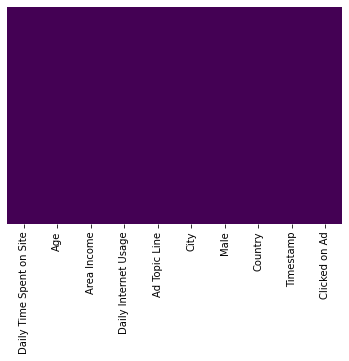

In [5]:
# Checando por NaN no Data Frame de maneira visual
sns.heatmap(ads.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Análise exploratória de dados vamos usar o seaborn para explorar os dados!

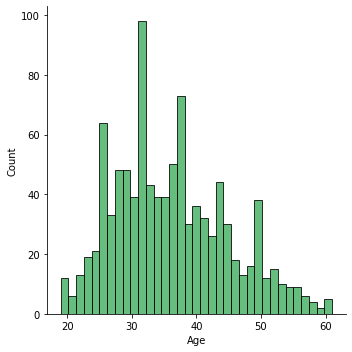

In [5]:
# Explorando a idade dos clientes
sns.displot(ads['Age'], bins=35, color='#32a852')

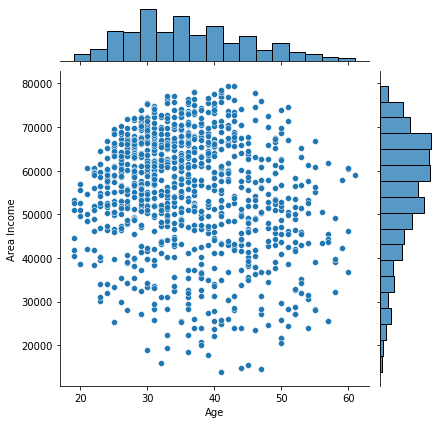

In [6]:
# Criando um jointplot com a area de renda vs idade
sns.jointplot(x='Age', y='Area Income', data=ads)

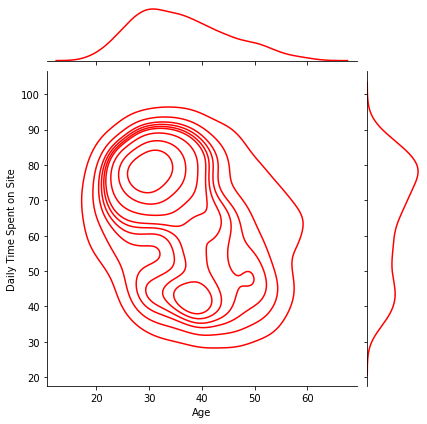

In [7]:
# Criando um jointplot com o tempo 'gasto' no site vs idade
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=ads, color='red', kind='kde')

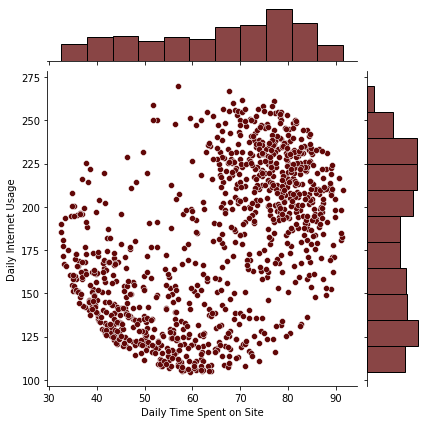

In [8]:
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=ads, color='#610707')

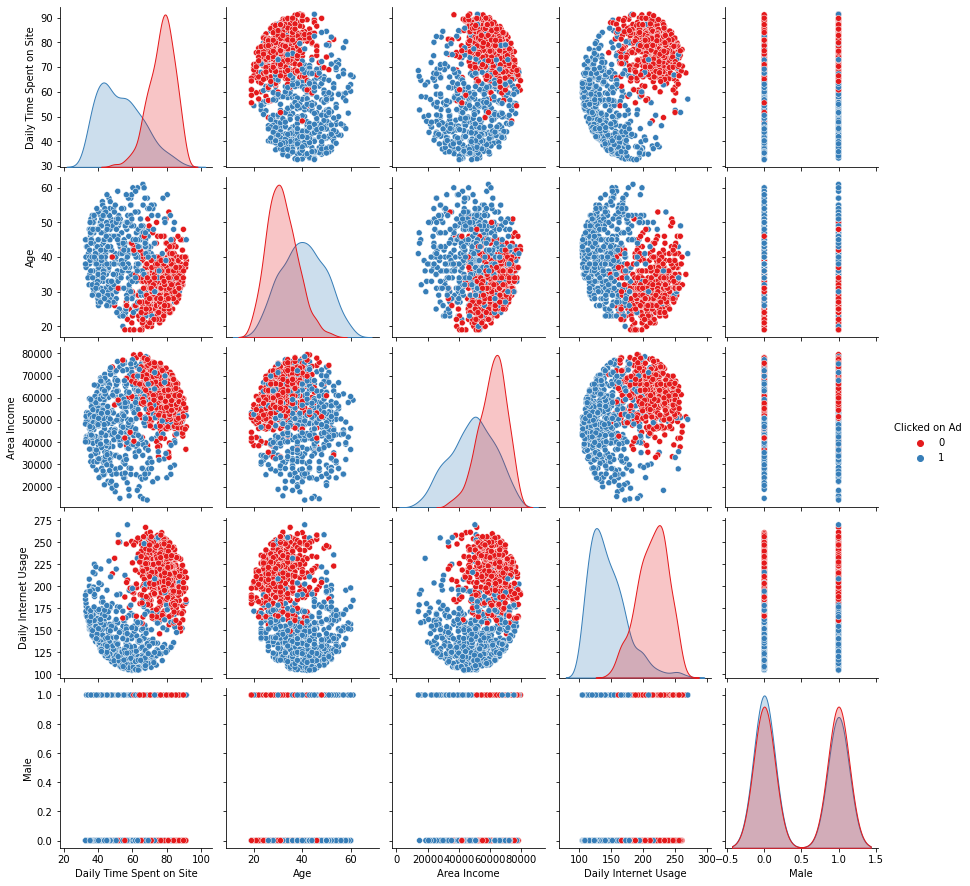

In [9]:
sns.pairplot(ads, hue='Clicked on Ad', palette='Set1')

# Regressao Logistica
#### Agora é hora de fazer um train teste e treinar nosso modelo!

In [10]:
ads.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [11]:
X = ads[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage','Male',]]

In [12]:
y = ads['Clicked on Ad']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
logmodelo = LogisticRegression()

In [17]:
logmodelo.fit(X_train, y_train)

LogisticRegression()

In [18]:
predicoes = logmodelo.predict(X_test)

In [19]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y_test, predicoes))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



Precision:
A precisão pode ser vista como uma medida da exatidão de um classificador. Para cada classe, é definido como a proporção de verdadeiros positivos para a soma de verdadeiros e falsos positivos. Dito de outra forma, "para todas as instâncias classificadas como positivas, qual porcentagem estava correta?"

Recall:
A recordação é uma medida da integridade do classificador; a capacidade de um classificador de encontrar corretamente todas as instâncias positivas. Para cada classe, é definido como a proporção de verdadeiros positivos para a soma de verdadeiros positivos e falsos negativos. Dito de outra forma, "para todas as instâncias que foram realmente positivas, qual porcentagem foi classificada corretamente?"

f1 - score:
A pontuação F1 é uma média harmônica ponderada de precisão e recall, de modo que a melhor pontuação é 1,0 e a pior é 0,0. De modo geral, as pontuações de F1 são mais baixas do que as medidas de precisão, pois incorporam precisão e recall em seus cálculos. Como regra geral, a média ponderada de F1 deve ser usada para comparar os modelos do classificador, não a precisão global.

support:
Suporte é o número de ocorrências reais da classe no conjunto de dados especificado. O suporte desequilibrado nos dados de treinamento pode indicar fraquezas estruturais nas pontuações relatadas do classificador e pode indicar a necessidade de amostragem estratificada ou rebalanceamento. O suporte não muda entre os modelos, mas sim diagnostica o processo de avaliação.

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
print(confusion_matrix(y_test, predicoes))

[[149   8]
 [ 14 129]]
